<a href="https://colab.research.google.com/github/Gaurav3666/Banglore-household-price-prediction/blob/main/House_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [285]:
data = pd.read_csv("/content/Bengaluru_House_Data.csv")

In [287]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [288]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [290]:
data['total_sqft'] = pd.to_numeric(data['total_sqft'],errors='coerce')


In [291]:
data["balcony"].value_counts()

,count
balcony,
2.0,5113
1.0,4897
3.0,1672
0.0,1029


In [292]:
data.isna().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,247
bath,73
balcony,609
price,0


Unnecesssery Columns Removed

In [293]:
data.drop(columns = ["area_type","availability","society"],inplace = True)

In [294]:
data

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600.0,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00


Filling Null Values

In [295]:
data["balcony"].fillna(data["balcony"].median(),inplace = True)

/tmp/ipython-input-958270987.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["balcony"].fillna(data["balcony"].median(),inplace = True)


In [296]:
data["location"].value_counts()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
3rd Stage Raja Rajeshwari Nagar,1
Chuchangatta Colony,1
"Electronic City Phase 1,",1


In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13073 non-null  float64
 3   bath        13247 non-null  float64
 4   balcony     13320 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(4), object(2)
memory usage: 624.5+ KB


In [298]:
data["location"] = data["location"].fillna("Sarjapur Road")

In [299]:
data["size"].value_counts()

,count
size,
2 BHK,5199
3 BHK,4310
4 Bedroom,826
4 BHK,591
3 Bedroom,547
1 BHK,538
2 Bedroom,329
5 Bedroom,297
6 Bedroom,191


In [300]:
data["size"]= data["size"].fillna("2 BHK")

In [301]:
data["bath"].describe()

,bath
count,13247.000000
mean,2.692610
std,1.341458
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,40.000000


In [302]:
data["bath"] = data["bath"].fillna(data["bath"].median())

In [303]:
data["total_sqft"] = data["total_sqft"].fillna(data["total_sqft"].median())

In [304]:
data.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [305]:
data['size'] = data['size'].str.extract('(\d+)')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-4195804094.py:1: SyntaxWarning: invalid escape sequence '\d'
  data['size'] = data['size'].str.extract('(\d+)')


In [306]:
data["size"] =  data["size"].astype(int)

In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  int64  
 2   total_sqft  13320 non-null  float64
 3   bath        13320 non-null  float64
 4   balcony     13320 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 624.5+ KB


In [308]:
data.rename(columns={'size': 'bhk'}, inplace=True)

In [310]:
data["location"]

,location
0,Electronic City Phase II
1,Chikka Tirupathi
2,Uttarahalli
3,Lingadheeranahalli
4,Kothanur
...,...
13315,Whitefield
13316,Richards Town
13317,Raja Rajeshwari Nagar
13318,Padmanabhanagar


In [311]:
data['location'] = data['location'].str.strip().str.lower()

In [312]:
location_count = data["location"].value_counts()

In [313]:
data["location"] =  data["location"].apply(lambda x: x if location_count[x] > 10 else 'other' )

In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   bhk         13320 non-null  int64  
 2   total_sqft  13320 non-null  float64
 3   bath        13320 non-null  float64
 4   balcony     13320 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 624.5+ KB


In [315]:
data["Price_per_sqft"] = data["price"]*100000/data["total_sqft"]

In [316]:
data.describe()

,bhk,total_sqft,bath,balcony,price,Price_per_sqft
count,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,2.802778,1549.750912,2.688814,1.603378,112.565627,7.968764e+03
std,1.294496,1227.502607,1.338754,0.803067,148.971674,1.062509e+05
min,1.000000,1.000000,1.000000,0.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,1.000000,50.000000,4.255319e+03
50%,3.000000,1275.000000,2.000000,2.000000,72.000000,5.454545e+03
75%,3.000000,1656.000000,3.000000,2.000000,120.000000,7.379158e+03
max,43.000000,52272.000000,40.000000,3.000000,3600.000000,1.200000e+07


Outlier Detection and Removal

In [317]:
data["Price_per_sqft"].describe()

,Price_per_sqft
count,1.332000e+04
mean,7.968764e+03
std,1.062509e+05
min,2.678298e+02
25%,4.255319e+03
50%,5.454545e+03
75%,7.379158e+03
max,1.200000e+07


In [318]:
data

,location,bhk,total_sqft,bath,balcony,price,Price_per_sqft
0,electronic city phase ii,2,1056.0,2.0,1.0,39.07,3699.810606
1,chikka tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,kothanur,2,1200.0,2.0,1.0,51.00,4250.000000
...,...,...,...,...,...,...,...
13315,whitefield,5,3453.0,4.0,0.0,231.00,6689.834926
13316,other,4,3600.0,5.0,2.0,400.00,11111.111111
13317,raja rajeshwari nagar,2,1141.0,2.0,1.0,60.00,5258.545136
13318,padmanabhanagar,4,4689.0,4.0,1.0,488.00,10407.336319


In [319]:
data.shape

(13320, 7)

{'whiskers': [<matplotlib.lines.Line2D at 0x788e21361b50>,
 'caps': [<matplotlib.lines.Line2D at 0x788e21362150>,
 'boxes': [<matplotlib.lines.Line2D at 0x788e213618b0>],
 'medians': [<matplotlib.lines.Line2D at 0x788e21362600>],
 'fliers': [<matplotlib.lines.Line2D at 0x788e213628d0>],
 'means': []}

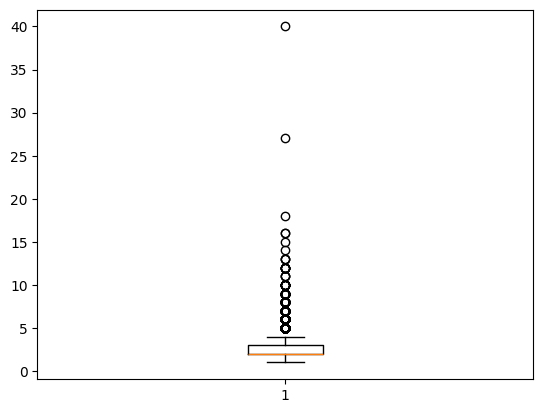

In [320]:
plt.boxplot(data["bath"])

In [321]:
(data["total_sqft"]/data["bhk"]).describe()

,0
count,13320.000000
mean,574.182756
std,389.398270
min,0.250000
25%,470.000000
50%,550.666667
75%,625.000000
max,26136.000000


In [325]:
data = data[((data["total_sqft"]/data["bhk"]) >=300)]

,bhk,total_sqft,bath,balcony,price,Price_per_sqft
count,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000
mean,2.649503,1584.247207,2.558774,1.603343,111.339779,6359.704366
std,0.976255,1250.652582,1.077092,0.796615,151.858461,4275.838611
min,1.000000,300.000000,1.000000,0.000000,8.440000,267.829813
25%,2.000000,1125.000000,2.000000,1.000000,49.000000,4200.000000
50%,3.000000,1291.000000,2.000000,2.000000,70.000000,5300.077942
75%,3.000000,1691.000000,3.000000,2.000000,115.000000,6964.285714
max,16.000000,52272.000000,16.000000,3.000000,3600.000000,176470.588235


In [326]:
(data["total_sqft"]/data["bhk"]).describe()

,0
count,12565.000000
mean,597.101322
std,388.938437
min,300.000000
25%,488.333333
50%,562.500000
75%,630.000000
max,26136.000000


In [330]:
def pps_outlier_removal(df):
  df_out = pd.DataFrame()
  for loc,subdf in df.groupby("location"):
    m = np.mean(subdf.Price_per_sqft)
    s = np.std(subdf.Price_per_sqft)
    gen_df = subdf[(subdf.Price_per_sqft > (m-s)) & (subdf.Price_per_sqft <= (m+s))]

    df_out = pd.concat([df_out,gen_df],ignore_index= True)
  return df_out

In [331]:
data = pps_outlier_removal(data)

In [332]:
data

,location,bhk,total_sqft,bath,balcony,price,Price_per_sqft
0,1st block jayanagar,4,2850.0,4.0,1.0,428.00,15017.543860
1,1st block jayanagar,3,1630.0,3.0,2.0,194.00,11901.840491
2,1st block jayanagar,3,1875.0,2.0,3.0,235.00,12533.333333
3,1st block jayanagar,3,1200.0,2.0,0.0,130.00,10833.333333
4,1st block jayanagar,2,1235.0,2.0,2.0,148.00,11983.805668
...,...,...,...,...,...,...,...
10474,yeshwanthpur,3,1676.0,3.0,2.0,92.13,5497.016706
10475,yeshwanthpur,3,2503.0,3.0,3.0,138.00,5513.383939
10476,yeshwanthpur,3,1855.0,3.0,3.0,135.00,7277.628032
10477,yeshwanthpur,3,1876.0,3.0,3.0,160.00,8528.784648


In [333]:
data.describe()

,bhk,total_sqft,bath,balcony,price,Price_per_sqft
count,10479.000000,10479.000000,10479.000000,10479.000000,10479.000000,10479.000000
mean,2.576486,1509.056728,2.475522,1.615612,92.032557,5681.658072
std,0.892828,882.314766,0.974844,0.778829,89.640298,2296.207450
min,1.000000,300.000000,1.000000,0.000000,10.000000,1250.000000
25%,2.000000,1113.000000,2.000000,1.000000,49.000000,4227.642276
50%,2.000000,1280.000000,2.000000,2.000000,67.000000,5181.818182
75%,3.000000,1650.000000,3.000000,2.000000,100.000000,6489.937932
max,16.000000,30400.000000,16.000000,3.000000,2200.000000,24509.803922


In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        10479 non-null  object 
 1   bhk             10479 non-null  int64  
 2   total_sqft      10479 non-null  float64
 3   bath            10479 non-null  float64
 4   balcony         10479 non-null  float64
 5   price           10479 non-null  float64
 6   Price_per_sqft  10479 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 573.2+ KB


<Axes: >

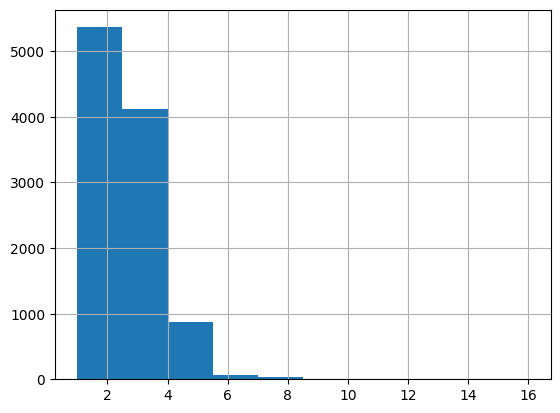

In [335]:
data["bhk"].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x788e212c6240>,
 'caps': [<matplotlib.lines.Line2D at 0x788e212c5070>,
 'boxes': [<matplotlib.lines.Line2D at 0x788e212c5f70>],
 'medians': [<matplotlib.lines.Line2D at 0x788e212c6d20>],
 'fliers': [<matplotlib.lines.Line2D at 0x788e212c7050>],
 'means': []}

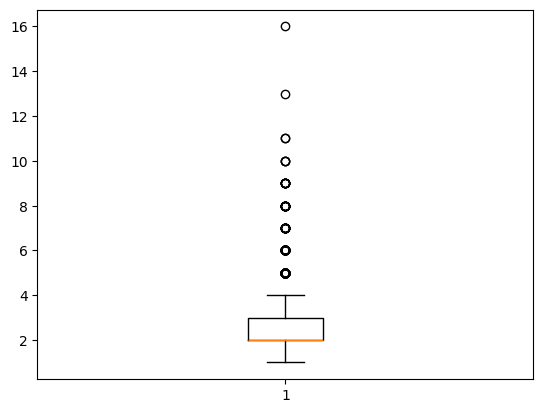

In [336]:
plt.boxplot(data["bhk"])

In [337]:
data["bhk"].value_counts()

,count
bhk,
2,4851
3,4122
4,767
1,515
5,111
6,62
7,20
8,16
9,8


In [348]:
def bhk_outlier_removal(df):
  exclude_indices = np.array([])
  for loc,locdf in df.groupby("location"):
    bhk_stats = {}
    for bhk,bhk_df in locdf.groupby("bhk"):
      bhk_stats["bhk"] = {
          "mean" : np.mean(bhk_df.Price_per_sqft),
          "std" : np.std(bhk_df.Price_per_sqft),
          "count" : bhk_df.shape[0]
      }
    for bhk,bhk_df in locdf.groupby("bhk"):
      stats = bhk_stats.get(bhk-1)
      if stats and stats["count"]>5:
        exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)

  return df.drop(exclude_indices,axis = "index")

In [349]:
data = bhk_outlier_removal(data)

In [350]:
data.describe()

,bhk,total_sqft,bath,balcony,price,Price_per_sqft
count,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000
mean,2.548715,1494.752057,2.449175,1.614212,91.077404,5681.273256
std,0.792954,844.433074,0.888751,0.777980,84.150795,2286.562547
min,1.000000,300.000000,1.000000,0.000000,10.000000,1250.000000
25%,2.000000,1111.000000,2.000000,1.000000,49.000000,4230.478736
50%,2.000000,1280.000000,2.000000,2.000000,67.000000,5188.679245
75%,3.000000,1644.000000,3.000000,2.000000,100.000000,6492.290481
max,6.000000,30400.000000,9.000000,3.000000,2100.000000,24509.803922


In [347]:
data.shape

(10428, 7)

In [351]:
data.to_csv("cleaned_data.csv")

In [340]:
data["bhk"].value_counts()

,count
bhk,
2,4851
3,4122
4,767
1,515
5,111
6,62


In [341]:
data.describe()

,bhk,total_sqft,bath,balcony,price,Price_per_sqft
count,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000
mean,2.548715,1494.752057,2.449175,1.614212,91.077404,5681.273256
std,0.792954,844.433074,0.888751,0.777980,84.150795,2286.562547
min,1.000000,300.000000,1.000000,0.000000,10.000000,1250.000000
25%,2.000000,1111.000000,2.000000,1.000000,49.000000,4230.478736
50%,2.000000,1280.000000,2.000000,2.000000,67.000000,5188.679245
75%,3.000000,1644.000000,3.000000,2.000000,100.000000,6492.290481
max,6.000000,30400.000000,9.000000,3.000000,2100.000000,24509.803922


In [352]:
data.drop(columns = ["Price_per_sqft"],inplace = True)

In [353]:
data.describe()

,bhk,total_sqft,bath,balcony,price
count,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000
mean,2.548715,1494.752057,2.449175,1.614212,91.077404
std,0.792954,844.433074,0.888751,0.777980,84.150795
min,1.000000,300.000000,1.000000,0.000000,10.000000
25%,2.000000,1111.000000,2.000000,1.000000,49.000000
50%,2.000000,1280.000000,2.000000,2.000000,67.000000
75%,3.000000,1644.000000,3.000000,2.000000,100.000000
max,6.000000,30400.000000,9.000000,3.000000,2100.000000


In [354]:
X = data.drop(columns=["price"])
y = data["price"]


In [355]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [356]:
num_cols = ["total_sqft", "bath", "balcony", "bhk"]
cat_cols = ["location"]

preprocess = ColumnTransformer([("num", StandardScaler(), num_cols),("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)])

model = Pipeline([("prep", preprocess),("lr", LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R2:", r2_score(y_test, y_pred))

R2: 0.8245179013948454
